In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
from bitcoin.validation import test_model
import numpy as np

df = test_model()

2018-03-24 19:19:01,140 root         INFO     Load data from SQL.
2018-03-24 19:19:01,334 root         INFO     Train Scaler Model


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2018-03-24 19:19:01,347 root         INFO     Train Model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 30/50
18263/18263 [==============================] - 2s 96us/step - loss: 42.7972 - mean_squared_error: 0.1347 - mean_absolute_error: 0.2879 - val_loss: 40.7524 - val_mean_squared_error: 0.0296 - val_mean_absolute_error: 0.1480
Epoch 31/50
18263/18263 [==============================] - 2s 97us/step - loss: 40.8809 - mean_squared_error: 0.1238 - mean_absolute_error: 0.2766 - val_loss: 38.9025 - val_mean_squared_error: 0.0283 - val_mean_absolute_error: 0.1460
Epoch 32/50
18263/18263 [==============================] - 2s 117us/step - loss: 39.0186 - mean_squared_error: 0.1111 - mean_absolute_error: 0.2621 - val_loss: 37.1187 - val_mean_squared_error: 0.0221 - val_mean_absolute_error: 0.1276
Epoch 33/50
18263/18263 [==============================] - 2s 104us/step - loss: 37.2365 - mean_squared_error: 0.0980 - mean_absolute_error: 0.2454 - val_loss: 35.3852 - val_mean_squared_error: 0.0140 - val_mean_absolute_error: 0.0987
Epoch 34/50
18263/18263 [==============================] - 2s 

2018-03-24 19:20:38,646 root         INFO     Load data from SQL.
2018-03-24 19:20:38,834 root         INFO     Test set of 945 items !


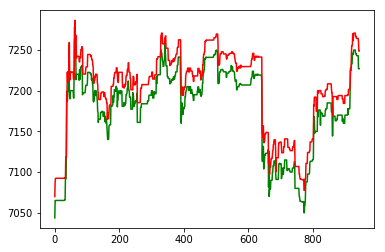

In [16]:
plt.plot(df['real'], 'g')
plt.plot(df['predicted'], 'r')

In [18]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

print("evs: %f" % explained_variance_score(df['real'], df['predicted']))
print("mae: %f" % explained_variance_score(df['real'], df['predicted'])))
print("msr: %f" % explained_variance_score(df['real'], df['predicted'])))
print("mdae: %f" % explained_variance_score(df['real'], df['predicted'])))

In [12]:
df[df.isnull().any(axis=1)]

,real,predicted,diff


In [13]:
df.describe()

,real,predicted,diff
count,945.000000,945.000000,945.000000
mean,7178.801820,7202.261079,-23.459259
std,50.801682,49.148368,5.781845
min,7043.700000,7069.980000,-56.710000
25%,7161.060000,7189.240000,-25.470000
50%,7194.370000,7217.520000,-23.150000
75%,7216.920000,7239.160000,-21.980000
max,7265.810000,7286.610000,27.400000


In [14]:
df.corr()

,real,predicted,diff
real,1.000000,0.993853,0.338202
predicted,0.993853,1.000000,0.231939
diff,0.338202,0.231939,1.000000


In [15]:
plt.plot(df['close'], 'b')

KeyError: 'close'

In [ ]:
max = df['open'].count()
limit = int(0.3 * max)
plt.plot(df['open'][0:max - limit], 'g')
plt.plot(df['open'][-limit:], 'r')

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
from bitcoin.core import Core
core = Core()
core.train_scaler(df=df)

In [ ]:
from bitcoin.core import Core
core = Core()
history = core.train(df=df)

In [ ]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [ ]:
core.train_anomaly(df=df)

In [ ]:
df_predicted = core.test_order_percent(df=df)

In [ ]:
df_predicted.describe()

In [ ]:
n_test = int(0.3 * df['open'].count())
df_test = df[-n_test:].reset_index()
plt.plot(df_test['close'], 'g')
plt.plot(df_predicted['predicted'], 'r')